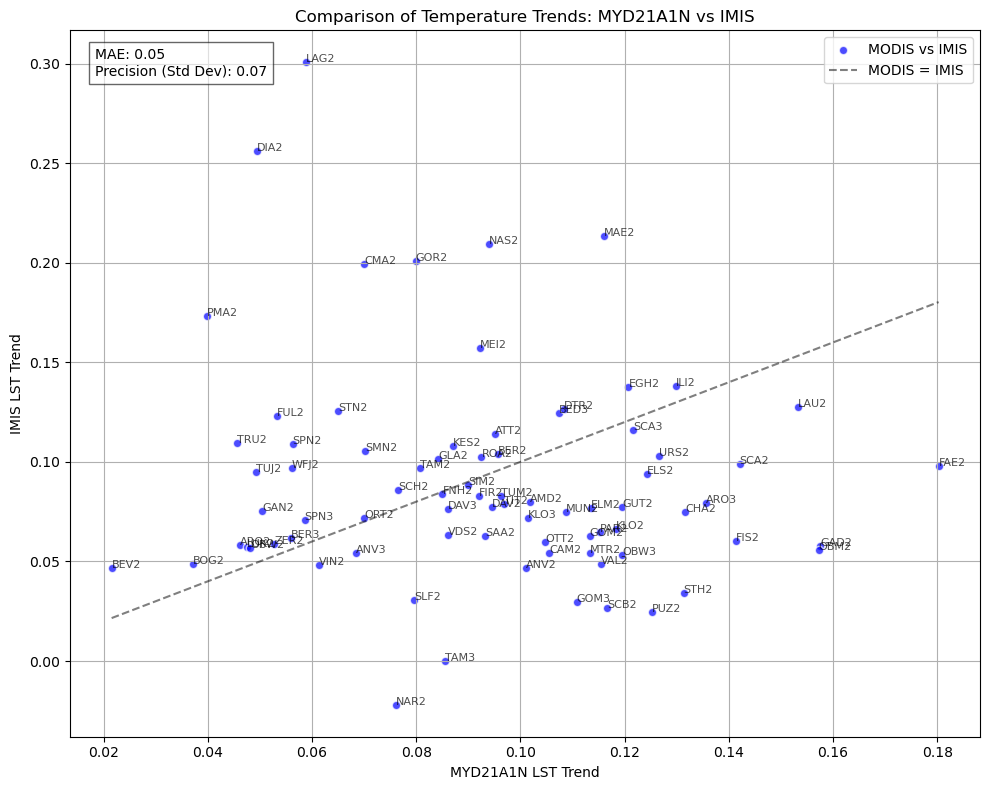

   Station  Slope (Trend)_MODIS  Slope (Trend)_IMIS
0     AMD2             0.101786            0.079716
1     ANV2             0.101031            0.046542
2     ANV3             0.068529            0.054318
3     ARO2             0.046257            0.058379
4     ARO3             0.135597            0.079598
..     ...                  ...                 ...
74    VAL2             0.115513            0.048742
75    VDS2             0.086067            0.063236
76    VIN2             0.061270            0.048299
77    WFJ2             0.056159            0.096851
78    ZER2             0.052784            0.058871

[79 rows x 3 columns]


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# Load the two files
modis_file_path = "E:\\all folders\\STUDIES\\UZH\\master thesis\\MODIS DATA\\Actual Data\\MYD21A1D\\Filtered_Data\\station_slopes.csv"
imis_file_path = "E:\\all folders\\STUDIES\\UZH\\master thesis\\IMIS data\\new data\\new processed data\\TSS_30MIN_MEAN_files\\Stations covering 2000till 2023\\analysis\\interporelated data\\NEW aqua day time\\Filtered_Data\\station_slopes.csv"

modis_df = pd.read_csv(modis_file_path)
imis_df = pd.read_csv(imis_file_path)

# Merge dataframes on the station name
merged_df = pd.merge(modis_df, imis_df, on='Station', suffixes=('_MODIS', '_IMIS'))

# Calculate accuracy (MAE), precision (standard deviation of differences), and R^2
mae = mean_absolute_error(merged_df['Slope (Trend)_MODIS'], merged_df['Slope (Trend)_IMIS'])
precision = np.std(merged_df['Slope (Trend)_MODIS'] - merged_df['Slope (Trend)_IMIS'])

# Create a paired scatter plot
plt.figure(figsize=(10, 8))

# Plot the data points
plt.scatter(merged_df['Slope (Trend)_MODIS'], merged_df['Slope (Trend)_IMIS'], color='blue', alpha=0.7, edgecolors='w', label='MODIS vs IMIS')

# Annotate each point with the station name
for i, row in merged_df.iterrows():
    plt.annotate(row['Station'], (row['Slope (Trend)_MODIS'], row['Slope (Trend)_IMIS']), fontsize=8, alpha=0.7)

# Add a reference line y=x for comparison
plt.plot([merged_df['Slope (Trend)_MODIS'].min(), merged_df['Slope (Trend)_MODIS'].max()], 
         [merged_df['Slope (Trend)_MODIS'].min(), merged_df['Slope (Trend)_MODIS'].max()], 
         '--k', alpha=0.5, label='MODIS = IMIS')

# Add labels and title
plt.xlabel('MYD21A1N LST Trend')
plt.ylabel('IMIS LST Trend')
plt.title('Comparison of Temperature Trends: MYD21A1N vs IMIS')

# Display grid for better visualization
plt.grid(True)

# Add accuracy, precision, and R² to the plot
textstr = f'MAE: {mae:.2f}\nPrecision (Std Dev): {precision:.2f}'
plt.gcf().text(0.1, 0.9, textstr, fontsize=10, bbox=dict(facecolor='white', alpha=0.6))

# Create a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Print merged dataframe for verification
print(merged_df)

